In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
import warnings 
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

1. slope_of_peak_exercise_st_segment (type: int): the slope of the peak exercise ST segment, an electrocardiography read out indicating quality of blood flow to the heart
2. thal (type: categorical): results of thallium stress test measuring blood flow to the heart, with possible values normal, fixed_defect, reversible_defect
3. resting_blood_pressure (type: int): resting blood pressure
4. chest_pain_type (type: int): chest pain type (4 values)
5. num_major_vessels (type: int): number of major vessels (0-3) colored by flourosopy
6. fasting_blood_sugar_gt_120_mg_per_dl (type: binary): fasting blood sugar > 120 mg/dl
7. resting_ekg_results (type: int): resting electrocardiographic results (values 0,1,2)
8. serum_cholesterol_mg_per_dl (type: int): serum cholestoral in mg/dl
9. oldpeak_eq_st_depression (type: float): oldpeak = ST depression induced by exercise relative to rest, a measure of abnormality in electrocardiograms
10. sex (type: binary): 0: female, 1: male
11. age (type: int): age in years
12. max_heart_rate_achieved (type: int): maximum heart rate achieved (beats per minute)
13. exercise_induced_angina (type: binary): exercise-induced chest pain (0: False, 1: True)
14. Heart disease present or not

In [2]:
import pandas as pd
data1 = pd.read_csv('values.csv')
data2 = pd.read_csv('labels.csv')
# using merge function by setting how='outer'
data = pd.merge(data1, data2,how='outer')
# displaying result
data.head()


,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


In [3]:
data.describe()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667,0.444444
std,0.618838,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474,0.498290
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000,0.000000
50%,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000,1.000000
max,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000,1.000000


In [4]:
data.shape

(180, 15)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 179
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   patient_id                            180 non-null    object 
 1   slope_of_peak_exercise_st_segment     180 non-null    int64  
 2   thal                                  180 non-null    object 
 3   resting_blood_pressure                180 non-null    int64  
 4   chest_pain_type                       180 non-null    int64  
 5   num_major_vessels                     180 non-null    int64  
 6   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 7   resting_ekg_results                   180 non-null    int64  
 8   serum_cholesterol_mg_per_dl           180 non-null    int64  
 9   oldpeak_eq_st_depression              180 non-null    float64
 10  sex                                   180 non-null    int64  
 11  age                

In [6]:
data = data.drop(["patient_id"],axis=1)
data.head()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


<AxesSubplot:xlabel='fasting_blood_sugar_gt_120_mg_per_dl'>

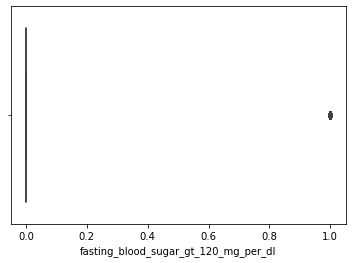

In [7]:
sns.boxplot(data.fasting_blood_sugar_gt_120_mg_per_dl)

In [8]:
np.mean(data['age'])

54.81111111111111

<AxesSubplot:xlabel='age'>

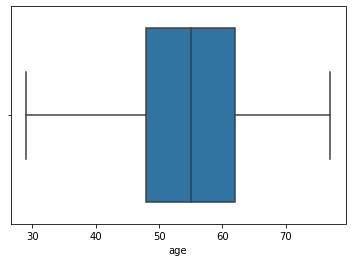

In [9]:
sns.boxplot(data.age)

<AxesSubplot:xlabel='serum_cholesterol_mg_per_dl'>

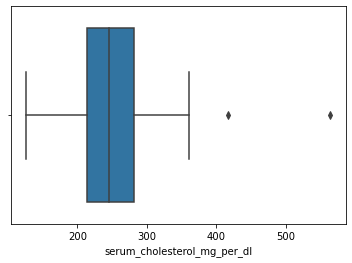

In [10]:
sns.boxplot(data.serum_cholesterol_mg_per_dl)

In [11]:
data.serum_cholesterol_mg_per_dl.min()

126

In [12]:
data.serum_cholesterol_mg_per_dl.describe()

count    180.000000
mean     249.211111
std       52.717969
min      126.000000
25%      213.750000
50%      245.500000
75%      281.250000
max      564.000000
Name: serum_cholesterol_mg_per_dl, dtype: float64

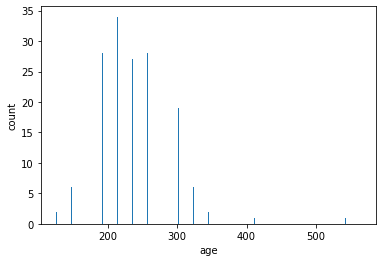

In [13]:
plt.hist(data.serum_cholesterol_mg_per_dl, bins=20, width=1)
plt.xlabel('age')
plt.ylabel('count')
plt.show()

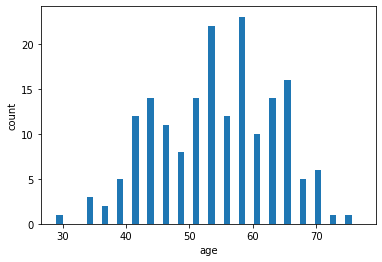

In [14]:
plt.hist(data.age, bins=20, width=1)
plt.xlabel('age')
plt.ylabel('count')
plt.show()

## Checking for null values

In [15]:
count  =  data.isnull().sum()
count[count>0]

Series([], dtype: int64)

#### no null values in the dataset

### encoding the data

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data.thal = le.fit_transform(data.thal)

In [17]:
data.head()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,1,1,128,2,0,0,2,308,0.0,1,45,170,0,0
1,2,1,110,3,0,0,0,214,1.6,0,54,158,0,0
2,1,1,125,4,3,0,2,304,0.0,1,77,162,1,1
3,1,2,152,4,0,0,0,223,0.0,1,40,181,0,1
4,3,2,178,1,0,0,2,270,4.2,1,59,145,0,0


## EDA

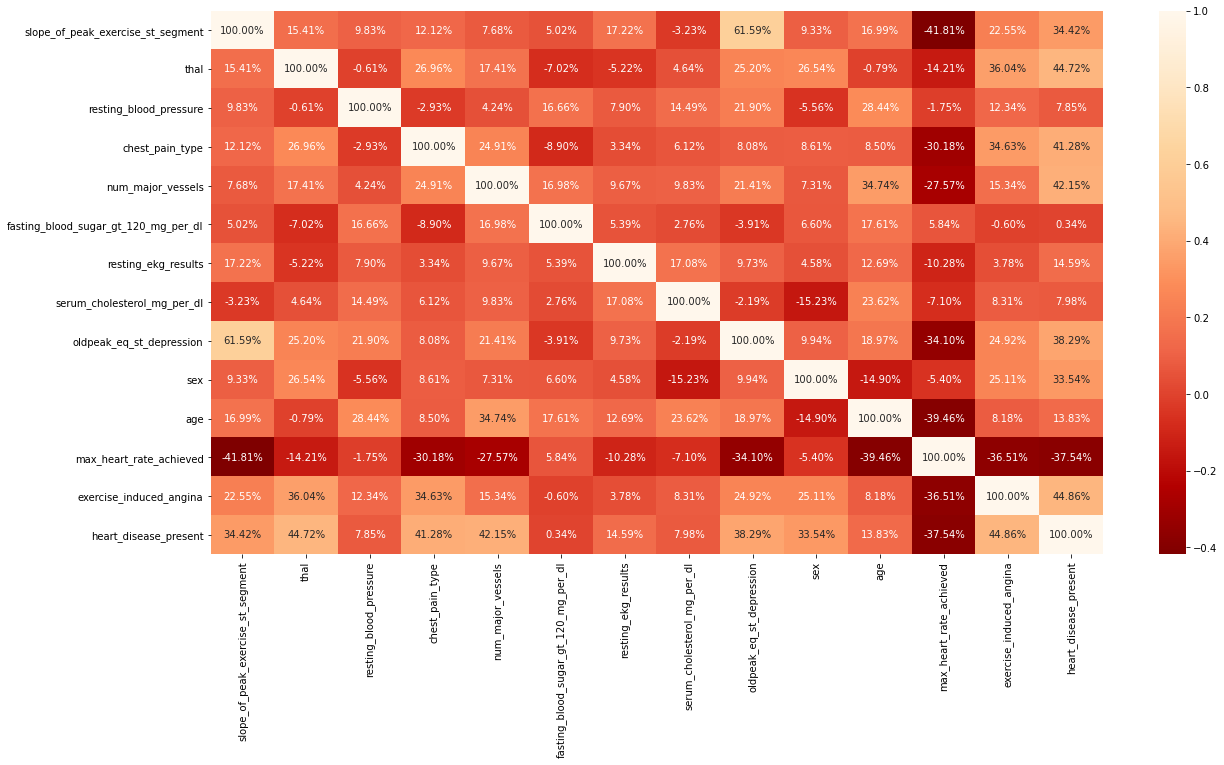

In [18]:
plt.figure(figsize=(20,10))
ax=sns.heatmap(data.corr(),annot=True,fmt='.2%', cmap='OrRd_r')

In [47]:
X = data.iloc[:, :-1]
y = data.heart_disease_present




#Scale Data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X=MinMaxScaler().fit_transform(X.values)
#X = pd.DataFrame(X)
#X.columns=(data.drop(['heart_disease_present'], axis= 1)).columns


In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=10)

In [49]:
from sklearn.linear_model import LogisticRegression
LRmodel = LogisticRegression(max_iter=3000)
LRmodel.fit(X_train, y_train)

LogisticRegression(max_iter=3000)

In [50]:
from sklearn.metrics import accuracy_score
y_predict=LRmodel.predict(X_test)
accuracy_score(y_test,y_predict)

0.8611111111111112

In [42]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_predict)

array([[20,  2],
       [ 3, 11]], dtype=int64)

In [24]:
from sklearn.ensemble import RandomForestClassifier
RFmodel = RandomForestClassifier()
RFmodel.fit(X_train, y_train)

RandomForestClassifier()

In [25]:
y_predict = RFmodel.predict(X_test)

In [26]:
accuracy_score(y_test, y_predict)

0.8333333333333334

In [27]:
pd.crosstab(y_test, y_predict)

col_0,0,1
heart_disease_present,,
0,20,2
1,4,10


In [28]:
from xgboost import XGBClassifier
XGmodel = XGBClassifier()
XGmodel.fit(X_train, y_train)

[11:51:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [29]:
y_predict = XGmodel.predict(X_test)

In [30]:
accuracy_score(y_test, y_predict)

0.7777777777777778

### SVM

In [31]:
SVMmodel = SVC(kernel='rbf', C=250, gamma=0.1)
SVMmodel.fit(X_train, y_train)

SVC(C=250, gamma=0.1)

In [32]:
y_predict = SVMmodel.predict(X_test)

In [33]:
accuracy_score(y_test, y_predict)

0.8055555555555556

In [34]:
pd.crosstab(y_test, y_predict)

col_0,0,1
heart_disease_present,,
0,18,4
1,3,11


## NB classifier

In [35]:
from sklearn.naive_bayes import BernoulliNB
NBmodel = BernoulliNB()
NBmodel.fit(X_train, y_train)

BernoulliNB()

In [36]:
y_predict = NBmodel.predict(X_test)

In [37]:
accuracy_score(y_test, y_predict)

0.8055555555555556